In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
#create an engine for the hawaii.sqlite database
#DO WE NEED THE , ECHO=FALSE AFTER THE DATABASE NAME
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
#this is also telling us the table names 
#without having to use the inspect function
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Save references to each table/Map each class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
#get column names and types foir measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#get column names and types for station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation 
#data and plot the results

# Calculate the last data point in the database
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [71]:
# Calculate the last data point in the database
last_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest date in database: " , last_date)


Latest date in database:  ('2017-08-23',)


In [147]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)

Date one year ago is:  2016-08-23


In [73]:
# Perform a query to retrieve the data and precipitation scores
last_precipitation=session.query(Measurement.prcp, Measurement.date).filter\
(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
last_precipitation

[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [74]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df=pd.DataFrame(last_precipitation, columns=['Precipitation', 'Dates'])
precipitation_df.set_index('Dates')
dates_df=precipitation_df.sort_values(by = 'Dates')

dates_df

,Precipitation,Dates
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24
...,...,...
2218,0.50,2017-08-22
2221,0.08,2017-08-23
2219,0.00,2017-08-23
2220,0.00,2017-08-23


<function matplotlib.pyplot.show(*args, **kw)>

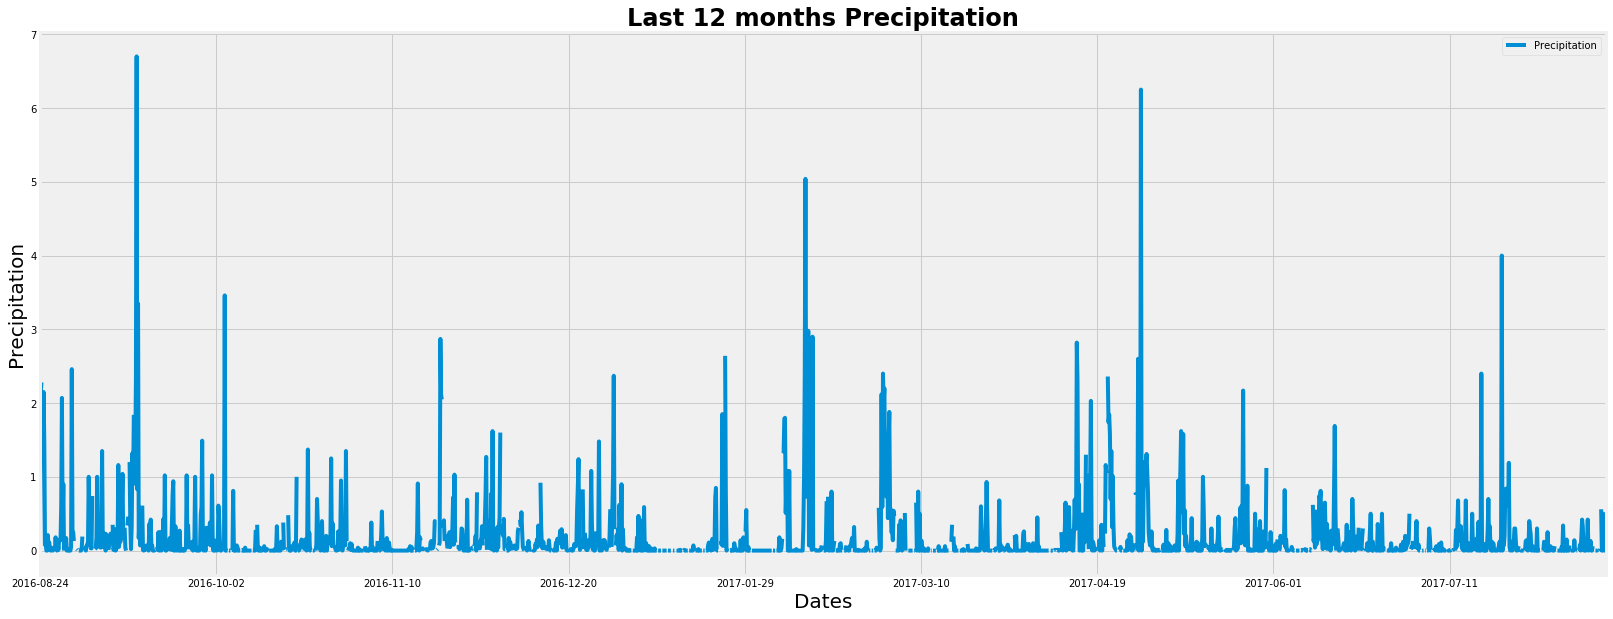

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
dates_df.plot('Dates', figsize=(25,10), grid=True)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Precipitation", fontsize=20)
plt.title("Last 12 months Precipitation", fontsize=24, weight='bold')
plt.tight_layout
plt.show

![precipitation](Images/precipitation.png)

In [75]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dates_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [84]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(Station.station).count()
stations

9

In [89]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                .group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT

active_station_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
active_station_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
active_station_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print("The minimum temperature recorded for the most active station, USC00519281, is: ", active_station_min)
print("The maximum for the most active station, USC00519281, is: ", active_station_max)
print("The average temperature recorded for the most active station, USC00519281, is: ", active_station_avg)

The minimum temperature recorded for the most active station, USC00519281, is:  [(54.0,)]
The maximum for the most active station, USC00519281, is:  [(85.0,)]
The average temperature recorded for the most active station, USC00519281, is:  [(71.66378066378067,)]


In [123]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
active_station_latest_dt=session.query (Measurement.date).filter(Measurement.station == 'USC00519281').\
                          order_by(Measurement.date.desc()).first()
print (active_station_latest_dt)
active_station_yr_by_date =  session.query(Measurement.tobs, Measurement.date).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2016,8,18').all()

active_station_yr_by_date

('2017-08-18',)


[(74.0, '2016-01-01'),
 (72.0, '2016-01-02'),
 (68.0, '2016-01-03'),
 (69.0, '2016-01-04'),
 (70.0, '2016-01-05'),
 (69.0, '2016-01-06'),
 (76.0, '2016-01-07'),
 (75.0, '2016-01-08'),
 (74.0, '2016-01-09'),
 (74.0, '2016-01-10'),
 (73.0, '2016-01-11'),
 (75.0, '2016-01-12'),
 (74.0, '2016-01-13'),
 (66.0, '2016-01-14'),
 (71.0, '2016-01-15'),
 (73.0, '2016-01-16'),
 (75.0, '2016-01-17'),
 (63.0, '2016-01-18'),
 (61.0, '2016-01-19'),
 (62.0, '2016-01-20'),
 (65.0, '2016-01-21'),
 (65.0, '2016-01-22'),
 (75.0, '2016-01-23'),
 (78.0, '2016-01-24'),
 (69.0, '2016-01-25'),
 (65.0, '2016-01-26'),
 (69.0, '2016-01-27'),
 (64.0, '2016-01-28'),
 (68.0, '2016-01-29'),
 (73.0, '2016-01-30'),
 (74.0, '2016-01-31'),
 (69.0, '2016-02-01'),
 (68.0, '2016-02-02'),
 (69.0, '2016-02-03'),
 (65.0, '2016-02-04'),
 (67.0, '2016-02-05'),
 (69.0, '2016-02-06'),
 (70.0, '2016-02-07'),
 (56.0, '2016-02-08'),
 (57.0, '2016-02-09'),
 (58.0, '2016-02-10'),
 (61.0, '2016-02-11'),
 (71.0, '2016-02-12'),
 (74.0, '20

In [124]:
active_station_yr =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2016,8,18').all()

active_station_yr

[(74.0),
 (72.0),
 (68.0),
 (69.0),
 (70.0),
 (69.0),
 (76.0),
 (75.0),
 (74.0),
 (74.0),
 (73.0),
 (75.0),
 (74.0),
 (66.0),
 (71.0),
 (73.0),
 (75.0),
 (63.0),
 (61.0),
 (62.0),
 (65.0),
 (65.0),
 (75.0),
 (78.0),
 (69.0),
 (65.0),
 (69.0),
 (64.0),
 (68.0),
 (73.0),
 (74.0),
 (69.0),
 (68.0),
 (69.0),
 (65.0),
 (67.0),
 (69.0),
 (70.0),
 (56.0),
 (57.0),
 (58.0),
 (61.0),
 (71.0),
 (74.0),
 (71.0),
 (75.0),
 (72.0),
 (71.0),
 (72.0),
 (69.0),
 (71.0),
 (72.0),
 (60.0),
 (69.0),
 (67.0),
 (64.0),
 (69.0),
 (69.0),
 (71.0),
 (69.0),
 (72.0),
 (63.0),
 (63.0),
 (62.0),
 (70.0),
 (72.0),
 (67.0),
 (74.0),
 (66.0),
 (68.0),
 (68.0),
 (72.0),
 (72.0),
 (71.0),
 (70.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (71.0),
 (66.0),
 (65.0),
 (63.0),
 (64.0),
 (72.0),
 (76.0),
 (76.0),
 (73.0),
 (72.0),
 (62.0),
 (65.0),
 (68.0),
 (74.0),
 (74.0),
 (74.0),
 (65.0),
 (69.0),
 (65.0),
 (68.0),
 (74.0),
 (70.0),
 (71.0),
 (74.0),
 (75.0),
 (73.0),
 (74.0),
 (76.0),
 (71.0),
 (68.0),
 (67.0),
 (72.0),
 

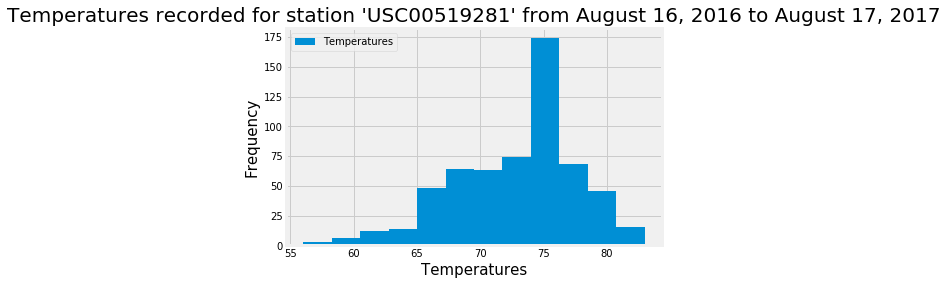

In [141]:
 #and plot the results as a histogram
    
active_station_df = pd.DataFrame(active_station_yr, columns = ['Temperatures'])
temp_list=active_station_df['Temperatures'].tolist()

plt.hist(temp_list, bins = 12)

plt.xlabel("Temperatures", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Temperatures recorded for station 'USC00519281' from August 16, 2016 to August 17, 2017" ,
           size = 20)
labels = ["Temperatures"]
plt.legend(labels)

#plt.savefig('Results/temperature_histogram.png')
plt.show()                               

![precipitation](Images/station-histogram.png)

In [142]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [156]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = "2016-08-23"
end_date = "2017-08-23"

def calc_temps_trip(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
my_trip_temps = (calc_temps_trip('2016-08-23', '2017-08-23'))
print(calc_temps_trip('2016-08-23', '2017-08-23'))
print("During my trip from {start_date} to {end_date}, the minimum, average and maximum temperatures were:", calc_temps_trip('2016-08-23', '2017-08-23'), "respectively.")

[(58.0, 74.59058295964125, 87.0)]
During my trip from {start_date} to {end_date}, the minimum, average and maximum temperatures were: [(58.0, 74.59058295964125, 87.0)] respectively.


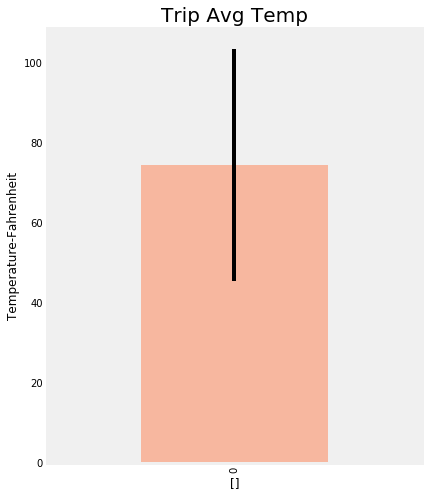

In [169]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
my_trip_temps_df = pd.DataFrame(my_trip_temps, columns=['Minimum Temp', 'Average Temp', 'Maximum Temp'])
average_temp = my_trip_temps_df['Average Temp']

tmax_tmin = my_trip_temps_df.iloc[0]['Maximum Temp'] - my_trip_temps_df.iloc[0]['Minimum Temp']
average_temp.plot(kind='bar', yerr=tmax_tmin, figsize=(6,8),  alpha=0.5,color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temperature-Fahrenheit")
plt.xlabel([])
plt.grid()
#plt.savefig("Results/MyTripTempSummary.png")
plt.show()

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [170]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


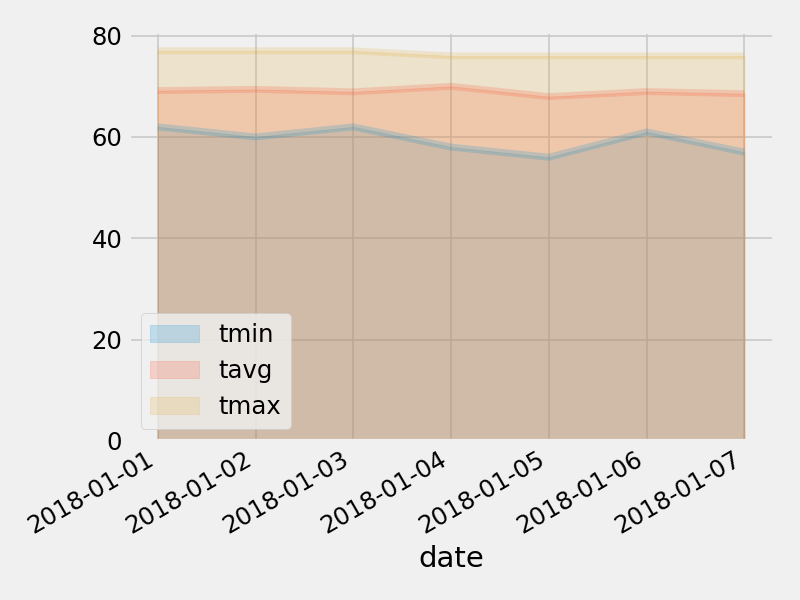

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
